In [2]:
import pandas as pd
import numpy as np
import os

import regex as re
import altair as alt
import matplotlib.pyplot as plt
import squarify

from datetime import datetime
from datetime import timedelta

In [10]:
"This is the final notebook Eric used to create his visuals for the CEWS report."

'This is the final notebook Eric used to create his visuals for the CEWS report.'

In [4]:
#os.chdir('Masters/capstone/w2020-data599-capstone-projects-statistics-canada-covid-19')
# os.chdir('../..')
os.getcwd()

'C:\\Users\\ebaxt\\Documents\\Masters\\capstone\\w2020-data599-capstone-projects-statistics-canada-covid-19'

## Note: In the Worker Count dataset, regions which span accross provincial borders are only counted on one side- Ottawa - Gatineau, Lloydminster, and Cambelton do not contain data on Quebec, Sask, Quebec sides, and as such these cities are not useable in "per capita" measures.

In [5]:
cews = pd.read_csv("CEWS_updated.csv")

# Datetime
cews.Period = pd.to_datetime(cews.Period, infer_datetime_format=True)


In [13]:
# Specify color schemes

# Alphabetical province list
provinces = sorted(list(cews.query("GeoAggregation == 'Province' and IndustryAggregation == 'All industries'")["Province"].unique()))
colors = ["#1f77b4", "#aec7e8", "#ff7f0e", "#2ca02c", "#d62728", "#ff9896", "#9467bd", "#8c564b", "#7f7f7f", "#c7c7c7", "#bcbd22", "#17becf", "#98df8a"]
provColors = pd.DataFrame(list(zip(provinces, colors)), columns = ["Province", "Color"]) 

industries = sorted(list(cews.query("GeoAggregation == 'Canada' and IndustryAggregation == 'Level 1'")["Industry"].unique()))
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#000000']
indColors = pd.DataFrame(list(zip(industries, colors)), columns = ["Industry", "Color"]) 

In [14]:
# I need to define a function which pulls out the desired provinces and colors as lists to be fed into altair
# For some reason there is no native way to match a color to a region, without including all possible values in the legend

def getProvCols(provinces):
    provinces = sorted(provinces)
    cols = provColors[provColors["Province"].isin(provinces)]
    cols = list(cols["Color"])
    return cols

def getIndCols(industries):
    industries = sorted(industries)
    cols = indColors[indColors["Industry"].isin(industries)]
    cols = list(cols["Color"])
    return cols

In [15]:
temp = cews.query("GeoAggregation == 'Canada' and IndustryAggregation == 'Level 1'")
temp = temp.groupby("Industry").sum().reset_index()

inds = sorted(list(cews.query("GeoAggregation == 'Canada' and IndustryAggregation == 'Level 1'")["Industry"].unique()))

fig1 = alt.Chart(temp, title = "Total CEWS Subsidies Given in Each Industry").mark_bar().encode(
    color = alt.Color("Industry", scale = alt.Scale(domain = inds, range = getIndCols(inds)), legend = None),
    x = alt.X("Subsidy"),
    y = alt.Y("Industry", sort = '-x', title = None)
)

In [16]:
cews.query("Industry == 'Utilities' and GeoAggregation == 'CMA/CA'")

,Period,RegionCode,Region,GeographicClassification,CensusLevel,IndustryCode,Industry,BusinessLocations,Subsidy,SupportedEmployees,RehiredEmployees,GeoAggregation,IndustryAggregation,ProvinceCode,Province,TotalEmployees
865,2020-03-15,10015,Corner Brook,URBAN,CA,22,Utilities,0.0,NaN,NaN,0.0,CMA/CA,Level 1,10.0,Newfoundland and Labrador,70.0
3846,2020-03-15,11110,Summerside,URBAN,CA,22,Utilities,0.0,NaN,NaN,0.0,CMA/CA,Level 1,11.0,Prince Edward Island,25.0
6260,2020-03-15,12205,Halifax,URBAN,CMA,22,Utilities,5.0,NaN,NaN,0.0,CMA/CA,Level 1,12.0,Nova Scotia,1510.0
17297,2020-03-15,24421,Québec,URBAN,CMA,22,Utilities,0.0,NaN,NaN,0.0,CMA/CA,Level 1,24.0,Quebec,1895.0
18566,2020-03-15,24456,Joliette,URBAN,CA,22,Utilities,0.0,NaN,NaN,0.0,CMA/CA,Level 1,24.0,Quebec,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552449,2020-09-27,48810,Lethbridge,URBAN,CMA,22,Utilities,0.0,NaN,NaN,0.0,CMA/CA,Level 1,48.0,Alberta,350.0
552534,2020-09-27,48825,Calgary,URBAN,CMA,22,Utilities,15.0,1491000.0,NaN,0.0,CMA/CA,Level 1,48.0,Alberta,8225.0
552683,2020-09-27,48835,Edmonton,URBAN,CMA,22,Utilities,0.0,NaN,NaN,0.0,CMA/CA,Level 1,48.0,Alberta,7190.0
560065,2020-09-27,59925,Kamloops,URBAN,CA,22,Utilities,0.0,NaN,NaN,0.0,CMA/CA,Level 1,59.0,British Columbia,275.0


In [17]:
temp = cews.query("GeoAggregation == 'Canada' and IndustryAggregation == 'Level 1'")
temp = temp.groupby("Industry").sum().reset_index()

temp["TotalEmployees"] = temp["TotalEmployees"] / 8
temp["Subsidy per Capita"] = temp["Subsidy"] / temp["TotalEmployees"]

inds = sorted(list(cews.query("GeoAggregation == 'Canada' and IndustryAggregation == 'Level 1'")["Industry"].unique()))

# The extra dataset does not use the same measures and is not directly comparable in this case. 
# fig2 = alt.Chart(temp, title = "CEWS Subsidies Given in Each Industry per Worker").mark_bar().encode(
#     color = alt.Color("Industry", scale = alt.Scale(domain = inds, range = getIndCols(inds)), legend = None),
#     x = alt.X("Subsidy per Capita"),
#     y = alt.Y("Industry", sort = '-x', title = None)
# )

fig1

alt.Chart(...)

In [18]:
temp = cews.query("GeoAggregation == 'urban/rural by country' and IndustryAggregation == 'Level 1' and GeographicClassification == 'RURAL'")
temp = temp.groupby("Industry").sum().reset_index()

inds = sorted(list(cews.query("GeoAggregation == 'Canada' and IndustryAggregation == 'Level 1'")["Industry"].unique()))

fig1 = alt.Chart(temp, title = "Total CEWS Subsidies Given in Each Industry (Rural CSDs)").mark_bar().encode(
    color = alt.Color("Industry", scale = alt.Scale(domain = inds, range = getIndCols(inds)), legend = None),
    x = alt.X("Subsidy"),
    y = alt.Y("Industry", sort = '-x', title = None)
)
fig1

alt.Chart(...)

In [8]:
cews.query("IndustryAggregation == 'Level 1' and GeoAggregation == 'Province'")

,Period,RegionCode,Region,GeographicClassification,CensusLevel,IndustryCode,Industry,BusinessLocations,Subsidy,SupportedEmployees,RehiredEmployees,GeoAggregation,IndustryAggregation,ProvinceCode,Province,TotalEmployees
0,2020-03-15,10,Newfoundland and Labrador,Not applicable,Not applicable,11,"Agriculture, forestry, fishing and hunting",30.0,823000.0,362.0,0.0,Province,Level 1,10.0,Newfoundland and Labrador,5605.0
6,2020-03-15,10,Newfoundland and Labrador,Not applicable,Not applicable,21,"Mining, quarrying, and oil and gas extraction",35.0,3562000.0,1158.0,0.0,Province,Level 1,10.0,Newfoundland and Labrador,8185.0
10,2020-03-15,10,Newfoundland and Labrador,Not applicable,Not applicable,22,Utilities,0.0,NaN,NaN,0.0,Province,Level 1,10.0,Newfoundland and Labrador,2490.0
11,2020-03-15,10,Newfoundland and Labrador,Not applicable,Not applicable,23,Construction,420.0,9823000.0,4015.0,25.0,Province,Level 1,10.0,Newfoundland and Labrador,19390.0
15,2020-03-15,10,Newfoundland and Labrador,Not applicable,Not applicable,31-33,Manufacturing,140.0,6091000.0,2407.0,15.0,Province,Level 1,10.0,Newfoundland and Labrador,13010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562000,2020-09-27,62,Nunavut,Not applicable,Not applicable,55,Management of companies and enterprises,0.0,NaN,NaN,0.0,Province,Level 1,62.0,Nunavut,10.0
562001,2020-09-27,62,Nunavut,Not applicable,Not applicable,56,"Administrative and support, waste management a...",0.0,NaN,NaN,0.0,Province,Level 1,62.0,Nunavut,310.0
562003,2020-09-27,62,Nunavut,Not applicable,Not applicable,62,Health care and social assistance,5.0,NaN,NaN,0.0,Province,Level 1,62.0,Nunavut,1095.0
562006,2020-09-27,62,Nunavut,Not applicable,Not applicable,71,"Arts, entertainment and recreation",0.0,NaN,NaN,0.0,Province,Level 1,62.0,Nunavut,240.0


In [20]:
temp = cews.query("GeoAggregation == 'Province' and IndustryAggregation == 'All industries'")
temp = temp.groupby("Region").sum().reset_index()

provs = sorted(list(cews.query("GeoAggregation == 'Province' and IndustryAggregation == 'All industries'")["Province"].unique()))

fig1 = alt.Chart(temp, title = "Total CEWS Subsidies Given in Each Province").mark_bar().encode(
    color = alt.Color("Region", scale = alt.Scale(domain = provs, range = getProvCols(provs)), legend = None),
    x = alt.X("Subsidy"),
    y = alt.Y("Region", sort = '-x', title = None)
)

In [21]:
temp = cews.query("GeoAggregation == 'Province'and IndustryAggregation == 'All industries'").\
    groupby(["Region", "Province"]).sum().reset_index()

# Whenever we do this sum aggregation, TotalEmployees is multiplied by 8 (number of claim periods) 
temp["TotalEmployees"] = temp["TotalEmployees"] / 8
temp["Subsidy per Capita"] = temp["Subsidy"] / temp["TotalEmployees"]

fig2 = alt.Chart(temp, title = "Subsidies given to Each Province per Worker").mark_bar().encode(
    color = alt.Color("Province", scale = alt.Scale(domain = list(provColors["Province"]), range = list(provColors["Color"])), legend = None),
    x = alt.X("Subsidy per Capita"),
    y = alt.Y("Region", sort = '-x', title = None)
)
fig1 & fig2

alt.VConcatChart(...)

In [22]:
temp = cews.query("GeoAggregation == 'CMA/CA' and IndustryAggregation == 'All industries'").groupby(["Region", "Province"]).sum().reset_index()
temp["TotalEmployees"] = temp["TotalEmployees"] / 8
temp["Subsidy per Capita"] = temp["Subsidy"] / temp["TotalEmployees"]
temp = temp[temp["TotalEmployees"] != 0]
temp = temp.sort_values("Subsidy per Capita").tail(15)
provs = list(np.unique(temp["Province"]))

alt.Chart(temp, title = "Ten Most Subsidized CMA/CA's per Worker").mark_bar().encode(
    color = alt.Color("Province", scale = alt.Scale(domain = provs, range = getProvCols(provs))),
    x = alt.X("Subsidy per Capita"),
    y = alt.Y("Region", sort = "-x")
)

alt.Chart(...)

<ipython-input-23-487b1d3d9648>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Industry"][i] = "Other"


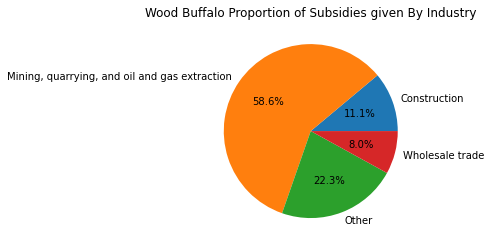

In [23]:
# Wood buffalo
temp = cews.query("GeoAggregation == 'CMA/CA' and IndustryAggregation == 'Level 1' and Region == 'Wood Buffalo'")
# Note that some values are supressed
temp = temp.dropna().groupby("Industry").sum().reset_index()
# Group smaller industries into 1
for i in range(len(temp)):
    if temp["Industry"][i] not in ["Mining, quarrying, and oil and gas extraction", "Construction", "Wholesale trade"]:
        temp["Industry"][i] = "Other"

temp = temp.groupby("Industry").sum().reset_index()

 # Plot
    
plt.pie(temp["Subsidy"], labels = temp["Industry"], autopct = '%1.1f%%')
plt.title("Wood Buffalo Proportion of Subsidies given By Industry")
#plt.savefig("WBSubByInd.png")
plt.show()

<ipython-input-24-782c88503c98>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2["Industry"][i] = "Other"


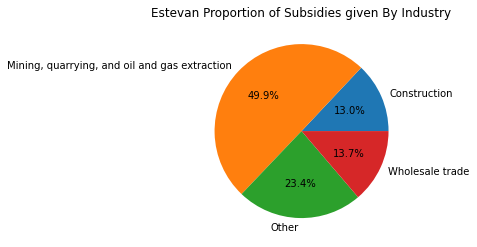

In [24]:
# Estevan
temp2 = cews.query("GeoAggregation == 'CMA/CA' and IndustryAggregation == 'Level 1' and Region == 'Estevan'")
# Note that some values are supressed
temp2 = temp2.dropna().groupby("Industry").sum().reset_index()

for i in range(len(temp2)):
    if temp2["Industry"][i] not in ["Mining, quarrying, and oil and gas extraction", "Construction", "Wholesale trade"]:
        temp2["Industry"][i] = "Other"

temp2 = temp2.groupby("Industry").sum().reset_index()

plt.pie(temp2["Subsidy"], labels = temp2["Industry"], autopct = '%1.1f%%')
plt.title("Estevan Proportion of Subsidies given By Industry")
#plt.savefig("ESubByInd.png")
plt.show()

<ipython-input-25-a769726040ba>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp3["Industry"][i] = "Other"


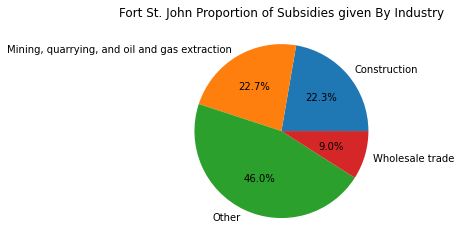

In [25]:
# Fort St. John
temp3 = cews.query("GeoAggregation == 'CMA/CA' and IndustryAggregation == 'Level 1' and Region == 'Fort St. John'")
# Note that some values are supressed
temp3 = temp3.dropna().groupby("Industry").sum().reset_index()

for i in range(len(temp3)):
    if temp3["Industry"][i] not in ["Mining, quarrying, and oil and gas extraction", "Construction", "Wholesale trade"]:
        temp3["Industry"][i] = "Other"

temp3 = temp3.groupby("Industry").sum().reset_index()

plt.pie(temp3["Subsidy"], labels = temp3["Industry"], autopct = '%1.1f%%')
plt.title("Fort St. John Proportion of Subsidies given By Industry")
#plt.savefig("FSJSubByInd.png")
plt.show()

In [26]:
temp6 = cews.query("GeoAggregation == 'CMA/CA' and IndustryAggregation == 'All industries'").groupby(["Region", "Province"]).sum().reset_index()
temp6["TotalEmployees"] = temp6["TotalEmployees"] / 8

temp6["Subsidy per Capita"] = temp6["Subsidy"] / temp6["TotalEmployees"]
temp6 = temp6[temp6["TotalEmployees"] != 0]

temp6 = temp6.sort_values("Subsidy per Capita")

# Pull out the names of the ten most subsidized regions 
mostSubsidized = temp6["Region"]


temp = cews[cews["Region"].isin(mostSubsidized)].query("GeoAggregation == 'CMA/CA' and IndustryAggregation == 'Level 1'")
temp = temp.groupby(["Region", "Industry"]).sum().reset_index()
# Finds the max subsidy given in each city
temp = temp[temp["Subsidy"] == temp.groupby("Region")["Subsidy"].transform(max)]

# Join the SubsidyPerPErson data from temp6
temp = temp6.filter(["Region", "Subsidy per Capita"]).merge(temp, how = "left", on = "Region")

inds = list(np.unique(temp["Industry"]))

alt.Chart(temp.sort_values("Subsidy per Capita"), title = "Ten Most Subsidized CMA/CA's per Worker").mark_bar().encode(
    color = alt.Color("Industry", scale = alt.Scale(domain = inds, range = getIndCols(inds))),
    x = alt.X("Subsidy per Capita"),
    y = alt.Y("Region", sort = "-x")
)

alt.Chart(...)

In [27]:
# Most subsidized industry in each province

temp = cews.query("GeoAggregation == 'Province' and IndustryAggregation == 'Level 1'")
temp = temp.groupby(["Region", "Industry"]).sum().reset_index()

temp = temp[temp["Subsidy"] == temp.groupby("Region")["Subsidy"].transform(max)]
inds = list(np.unique(temp["Industry"]))

alt.Chart(temp, title = "The Industry in Each Province Which Received the Most CEWS Subsidies").mark_bar().encode(
    x = alt.X("Subsidy"),
    y = alt.Y("Region", sort = "-x"),
    color = alt.Color("Industry", scale = alt.Scale(domain = inds, range = getIndCols(inds)))
)

alt.Chart(...)

In [28]:
temp = cews.query("GeographicClassification == 'URBAN' and GeoAggregation == 'CMA/CA' and IndustryAggregation == 'Level 1'").\
    groupby(["Region", "Industry"]).sum().sort_values("BusinessLocations").sort_values("Subsidy").tail(10).reset_index()
inds = list(np.unique(temp["Industry"]))

alt.Chart(temp, title = "10 largest subsidies Given to Metropolitan Areas").mark_bar().encode(
    x = alt.X("Subsidy"),
    y = alt.Y("Region", sort = "-x"),
    color = alt.Color("Industry", scale = alt.Scale(domain = inds, range = getIndCols(inds)))
)

alt.Chart(...)

In [29]:
temp = cews.query("GeographicClassification == 'RURAL' and GeoAggregation == 'CSD' and IndustryAggregation == 'Level 1'").\
    groupby(["Region", "Industry"]).sum().sort_values("BusinessLocations").sort_values("Subsidy").tail(10).reset_index()
inds = list(np.unique(temp["Industry"]))

alt.Chart(temp, title = "10 largest subsidies Given to Rural Communities").mark_bar().encode(
    x = alt.X("Subsidy"),
    y = alt.Y("Region", sort = "-x"),
    color = alt.Color("Industry", scale = alt.Scale(domain = inds, range = getIndCols(inds)))
)

alt.Chart(...)

In [30]:
temp = cews.query("GeographicClassification == 'RURAL' and GeoAggregation == 'CSD' and IndustryAggregation == 'All industries'")

temp = temp.groupby(["Region", "Province"]).sum().reset_index().sort_values("Subsidy")
temp = temp.tail(15)
provs = list(np.unique(temp["Province"]))

alt.Chart(temp, title = "15 Rural CSD's Recieving the Most CEWs Subsidy").mark_bar().encode(
    color = alt.Color("Province", scale = alt.Scale(domain = provs, range = getProvCols(provs))),
    x = alt.X("Subsidy"),
    y = alt.Y("Region", sort = "-x")
)

alt.Chart(...)

In [63]:
# We want to look at the industry breakdown for some of these highly subsidized areas of Alberta to
#figure out what happened to make rural Alberta so subsidized.

temp = cews.query("Region == 'Banff' and GeoAggregation == 'CSD' and IndustryAggregation == 'Level 1'").\
    groupby(["Region", "Industry"]).sum().reset_index()

alt.Chart(temp, title = "Subsidies Given in Banff").mark_bar(color = "#1f77b4").encode(
    x = alt.X("Subsidy"),
    y = alt.Y("Industry")
)

alt.Chart(...)

In [64]:
temp = cews.query("Region == 'Grande Prairie County No. 1' and GeoAggregation == 'CSD' and IndustryAggregation == 'Level 1'").\
    groupby(["Region", "Industry"]).sum().reset_index()

alt.Chart(temp, title = "Subsidies Given in Grande Prairie County No. 1").mark_bar(color = "#1f77b4").encode(
    x = alt.X("Subsidy"),
    y = alt.Y("Industry")
)

alt.Chart(...)

In [66]:
temp = cews.query("Region == 'Red Deer County' and GeoAggregation == 'CSD' and IndustryAggregation == 'Level 1'").\
    groupby(["Region", "Industry"]).sum().reset_index()

alt.Chart(temp, title = "Subsidies Given in Red Deer County").mark_bar(color = "#1f77b4").encode(
    x = alt.X("Subsidy"),
    y = alt.Y("Industry")
)

alt.Chart(...)

In [70]:
temp = cews.query("Region == 'Bonnyville' and GeoAggregation == 'CSD' and IndustryAggregation == 'Level 1'").\
    groupby(["Region", "Industry"]).sum().reset_index()

alt.Chart(temp, title = "Subsidies Given in Bonnyville").mark_bar(color = "#1f77b4").encode(
    x = alt.X("Subsidy"),
    y = alt.Y("Industry")
)

alt.Chart(...)

In [69]:
temp = cews.query("Region == 'Jasper' and GeoAggregation == 'CSD' and IndustryAggregation == 'Level 1'").\
    groupby(["Region", "Industry"]).sum().reset_index()

alt.Chart(temp, title = "Subsidies Given in Jasper").mark_bar(color = "#1f77b4").encode(
    x = alt.X("Subsidy"),
    y = alt.Y("Industry")
)

alt.Chart(...)

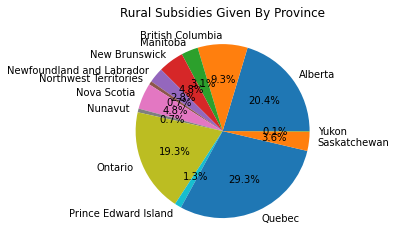

In [31]:
temp = cews.query("GeographicClassification == 'RURAL' and GeoAggregation == 'urban/rural by province' and IndustryAggregation == 'All industries'")
temp = temp.groupby("Province").sum().reset_index()

plt.pie(temp["Subsidy"], labels = temp["Province"], autopct = '%1.1f%%')
plt.title("Rural Subsidies Given By Province")
#plt.savefig("ESubByInd.png")
plt.show()

In [32]:
# Remake above as bar chart, as per Scott's notes

temp = cews.query("GeographicClassification == 'RURAL' and GeoAggregation == 'urban/rural by province' and IndustryAggregation == 'All industries'")
temp = temp.groupby(["Region","Province"]).sum().reset_index()
provs = list(np.unique(temp["Province"]))

alt.Chart(temp, title = "Total CEWS Subsidies Given to Rural Areas of Each Province").mark_bar().encode(
    color = alt.Color("Province", scale = alt.Scale(domain = provs, range = getProvCols(provs)), legend = None),
    x = alt.X("Subsidy"),
    y = alt.Y("Province", sort = '-x')
)

alt.Chart(...)

In [33]:
temp = cews.query("GeographicClassification == 'RURAL' and GeoAggregation == 'urban/rural by province' and IndustryAggregation == 'All industries'")
temp #= temp.groupby("Province").sum().reset_index()

# plt.pie(temp["Subsidy"], labels = temp["Province"], autopct = '%1.1f%%')
# plt.title("Rural Subsidies Given By Province")
# #plt.savefig("ESubByInd.png")
# plt.show()

,Period,RegionCode,Region,GeographicClassification,CensusLevel,IndustryCode,Industry,BusinessLocations,Subsidy,SupportedEmployees,RehiredEmployees,GeoAggregation,IndustryAggregation,ProvinceCode,Province,TotalEmployees
188,2020-03-15,10-rural,Newfoundland and Labrador - rural part,RURAL,Not applicable,TOTAL,All Industries,1150.0,17397000.0,8735.0,130.0,urban/rural by province,All industries,10.0,Newfoundland and Labrador,NaN
2718,2020-03-15,11-rural,Prince Edward Island - rural part,RURAL,Not applicable,TOTAL,All Industries,425.0,5608000.0,2985.0,30.0,urban/rural by province,All industries,11.0,Prince Edward Island,NaN
4101,2020-03-15,12-rural,Nova Scotia - rural part,RURAL,Not applicable,TOTAL,All Industries,2020.0,28167000.0,15461.0,170.0,urban/rural by province,All industries,12.0,Nova Scotia,NaN
6830,2020-03-15,13-rural,New Brunswick - rural part,RURAL,Not applicable,TOTAL,All Industries,1605.0,29422000.0,14728.0,155.0,urban/rural by province,All industries,13.0,New Brunswick,NaN
10722,2020-03-15,24-rural,Quebec - rural part,RURAL,Not applicable,TOTAL,All Industries,9055.0,159204000.0,80126.0,1115.0,urban/rural by province,All industries,24.0,Quebec,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547368,2020-09-27,48-rural,Alberta - rural part,RURAL,Not applicable,TOTAL,All Industries,4500.0,63905000.0,58554.0,265.0,urban/rural by province,All industries,48.0,Alberta,NaN
553044,2020-09-27,59-rural,British Columbia - rural part,RURAL,Not applicable,TOTAL,All Industries,2385.0,22850000.0,25490.0,150.0,urban/rural by province,All industries,59.0,British Columbia,NaN
561373,2020-09-27,60-rural,Yukon - rural part,RURAL,Not applicable,TOTAL,All Industries,35.0,222000.0,235.0,0.0,urban/rural by province,All industries,60.0,Yukon,NaN
561736,2020-09-27,61-rural,Northwest Territories - rural part,RURAL,Not applicable,TOTAL,All Industries,65.0,2757000.0,1551.0,0.0,urban/rural by province,All industries,61.0,Northwest Territories,NaN


In [34]:
temp = cews.query("GeographicClassification == 'URBAN' and GeoAggregation == 'CMA/CA' and IndustryAggregation == 'All industries'")

temp = temp.groupby(["Region", "Province"]).sum().reset_index().sort_values("Subsidy")
temp = temp.tail(15)
provs = list(np.unique(temp["Province"]))

alt.Chart(temp, title = "15 Urban CMA/CA's Recieving the Most CEWs Subsidy").mark_bar().encode(
    color = alt.Color("Province", scale = alt.Scale(domain = provs, range = getProvCols(provs))),
    x = alt.X("Subsidy"),
    y = alt.Y("Region", sort = "-x")
)

alt.Chart(...)

In [35]:
temp = cews.query("GeographicClassification == 'RURAL' and GeoAggregation == 'CSD' and IndustryAggregation == 'All industries'")

temp = temp.groupby(["Region", "Province"]).sum().reset_index()
temp["TotalEmployees"] = temp["TotalEmployees"] / 8
temp = temp[temp["TotalEmployees"] > 500]
temp["Subsidy per Capita"] = temp["Subsidy"] / temp["TotalEmployees"]
temp = temp.sort_values("Subsidy per Capita").tail(15)
provs = list(np.unique(temp["Province"]))

alt.Chart(temp, title = "15 Rural CSD's Recieving the Most CEWs Subsidy per Worker").mark_bar().encode(
    color = alt.Color("Province", scale = alt.Scale(domain = provs, range = getProvCols(provs))),
    x = alt.X("Subsidy per Capita"),
    y = alt.Y("Region", sort = "-x")
)

alt.Chart(...)

In [36]:
temp = cews.query("GeographicClassification == 'URBAN' and GeoAggregation == 'CMA/CA' and IndustryAggregation == 'All industries'")

temp = temp.groupby(["Region", "Province"]).sum().reset_index()
temp["TotalEmployees"] = temp["TotalEmployees"] / 8
temp = temp[temp["TotalEmployees"] != 0]
temp["Subsidy per Capita"] = temp["Subsidy"] / temp["TotalEmployees"]
temp = temp.sort_values("Subsidy per Capita")
temp = temp.tail(15)
provs = list(np.unique(temp["Province"]))

alt.Chart(temp, title = "15 CMA/CAs Recieving the Most CEWs Subsidy per Worker").mark_bar().encode(
    color = alt.Color("Province", scale = alt.Scale(domain = provs, range = getProvCols(provs))),
    x = alt.X("Subsidy per Capita"),
    y = alt.Y("Region", sort = "-x")
)

alt.Chart(...)

In [37]:
temp = cews.query("GeographicClassification == 'RURAL' and GeoAggregation == 'CSD' and IndustryAggregation == 'All industries'")

temp = temp.groupby(["Region", "Province"]).sum().reset_index().sort_values("Subsidy", ascending = False)
temp["TotalEmployees"] = temp["TotalEmployees"] / 8
temp = temp[temp["TotalEmployees"] > 500]

temp3 = pd.DataFrame({'Region': [], 'Province': [], 'BusinessLocations': [],
                     'Subsidy': [], 'SupportedEmployees': [], 'RehiredEmployees': []})

# Find the most subsidized CSD in each Province and append it to temp3
for prov in set(temp["Province"]):
    temp2 = temp[temp["Province"] == prov].reset_index()
    temp3 = temp3.append(temp2.iloc[temp2['Subsidy'].idxmax()])
    
provs = list(np.unique(temp3["Province"]))
    
alt.Chart(temp3, title = "Total Subsidies Given to the Most Subsidized Rural CSD in Each Province").mark_bar().encode(
    color = alt.Color("Province", scale = alt.Scale(domain = provs, range = getProvCols(provs))),
    x = alt.X("Subsidy"),
    y = alt.Y("Region", sort = "-x")
)

alt.Chart(...)

In [38]:
temp = cews.query("GeographicClassification == 'RURAL' and GeoAggregation == 'CSD' and IndustryAggregation == 'All industries'")

temp = temp.groupby(["Region", "Province"]).sum().reset_index()
temp["TotalEmployees"] = temp["TotalEmployees"] / 8
temp = temp[temp["TotalEmployees"] > 500]

temp["Subsidy per Capita"] = temp["Subsidy"] / temp["TotalEmployees"]
temp = temp.reset_index()
temp3 = pd.DataFrame({'Region': [], 'Province': [], 'BusinessLocations': [],
                     'Subsidy': [], 'SupportedEmployees': [], 'RehiredEmployees': []})

# Find the most subsidized CSD in each Province and append it to temp3
for prov in set(temp["Province"]):
    temp2 = temp[temp["Province"] == prov].reset_index()
    temp3 = temp3.append(temp2.iloc[temp2['Subsidy per Capita'].idxmax()])
    
provs = list(np.unique(temp3["Province"]))
    
alt.Chart(temp3, title = "Total Subsidies Given to the Most Subsidized Rural CSD in Each Province (per worker)").mark_bar().encode(
    color = alt.Color("Province", scale = alt.Scale(domain = provs, range = getProvCols(provs))),
    x = alt.X("Subsidy per Capita"),
    y = alt.Y("Region", sort = "-x")
)

alt.Chart(...)

In [39]:
temp = cews.query("GeographicClassification == 'RURAL' and GeoAggregation == 'CSD' and IndustryAggregation == 'All industries'")

temp = temp.groupby(["Region", "Province"]).sum().reset_index().sort_values("Subsidy")
temp["TotalEmployees"] = temp["TotalEmployees"] / 8

temp["Subsidy per Capita"] = temp["Subsidy"] / temp["TotalEmployees"]
temp.tail(15)

,Region,Province,BusinessLocations,Subsidy,SupportedEmployees,RehiredEmployees,ProvinceCode,TotalEmployees,Subsidy per Capita
1314,Montmagny,Quebec,1050.0,28767000.0,16787.0,120.0,192.0,5200.0,5532.115385
1701,Rocky Mountain House,Alberta,1070.0,28931000.0,13599.0,80.0,384.0,3140.0,9213.694268
864,Huntsville,Ontario,1665.0,28948000.0,16470.0,150.0,280.0,9695.0,2985.869005
1568,Plessisville,Quebec,780.0,29834000.0,14565.0,85.0,384.0,4405.0,6772.758229
594,Edson,Alberta,1535.0,32216000.0,15305.0,115.0,384.0,4440.0,7255.855856
784,Haldimand County,Ontario,1925.0,32842000.0,19269.0,185.0,280.0,22825.0,1438.860898
1307,Mont-Tremblant,Quebec,1705.0,36275000.0,22236.0,185.0,192.0,4460.0,8133.408072
2513,Whitecourt,Alberta,1770.0,40069000.0,19815.0,155.0,384.0,5310.0,7545.951036
543,Drayton Valley,Alberta,1945.0,42949000.0,19777.0,155.0,384.0,3725.0,11529.932886
2316,Taber,Alberta,1045.0,44761000.0,18580.0,65.0,768.0,6905.0,6482.404055


In [40]:
divisions = list(temp3["Region"])
charts = [0]*13
for div, i in zip(divisions, range(len(divisions))):
    temp = cews.query("GeoAggregation == 'CSD' and IndustryAggregation == 'Level 1'")
    temp = temp[temp["Region"] == div]
    prov = temp["Province"].iloc[0]
    provs = list(np.unique(temp["Province"]))
    charts[i] = alt.Chart(temp, title = f"{div}, {prov}").mark_bar(color = getProvCols(provs)[0]).encode(
                    x = alt.X("Subsidy"),        
                    y = alt.Y("Industry"),
                )

fig1 = charts[0] & charts[1] & charts[2] & charts[3]
fig2 = charts[4] & charts[5] & charts[6] & charts[7]
fig3 = charts[8] & charts[9] & charts[10]
fig4 = charts[11] & charts[12]

In [41]:
fig1

alt.VConcatChart(...)

In [42]:
fig2

alt.VConcatChart(...)

In [43]:
fig3

alt.VConcatChart(...)

In [44]:
fig4

alt.VConcatChart(...)

In [45]:
temp = cews.query("GeographicClassification == 'URBAN' and GeoAggregation == 'CMA/CA' and IndustryAggregation == 'All industries'")

temp = temp.groupby(["Region", "Province"]).sum().reset_index().sort_values("Subsidy", ascending = False)

temp3 = pd.DataFrame({'Region': [], 'Province': [], 'BusinessLocations': [],
                     'Subsidy': [], 'SupportedEmployees': [], 'RehiredEmployees': []})

# Find the most subsidized CSD in each Province and append it to temp3
for prov in set(temp["Province"]):
    temp2 = temp[temp["Province"] == prov].reset_index()
    temp3 = temp3.append(temp2.iloc[temp2['Subsidy'].idxmax()])
    
provs = list(np.unique(temp3["Province"]))

alt.Chart(temp3, title = "Total Subsidies Given to the Most Subsidized Urban CSD in Each Province").mark_bar().encode(
    alt.Color("Province", scale = alt.Scale(domain = provs, range = getProvCols(provs))),
    x = alt.X("Subsidy"),
    y = alt.Y("Region", sort = "-x")
)

alt.Chart(...)

In [46]:
# Note: Nunavut and NW Territoires have no CMA/CAs

divisions = list(temp3["Region"])
charts = [0]*13
for div, i in zip(divisions, range(len(divisions))):
    temp = cews.query("GeoAggregation == 'CSD' and IndustryAggregation == 'Level 1'")
    temp = temp[temp["Region"] == div]
    prov = temp["Province"].iloc[0]
    provs = list(np.unique(temp["Province"]))
    charts[i] = alt.Chart(temp, title = f"{div}, {prov}").mark_bar(color = getProvCols(provs)[0]).encode(
                    x = alt.X("Subsidy"),        
                    y = alt.Y("Industry"),
                )

(charts[0]|charts[1]) & (charts[2]|charts[3]) & (charts[4]|charts[5]) &\
(charts[6]|charts[7]) & (charts[8]|charts[9]) & (charts[10])

alt.VConcatChart(...)

In [47]:
temp = cews.query("GeoAggregation == 'CSD' and IndustryAggregation == 'Level 1'")

temp = temp.groupby(["Region", "Province", "Industry"]).sum().reset_index().sort_values("Subsidy", ascending = False)
temp

temp3 = pd.DataFrame({'Region': [], 'Province': [], 'BusinessLocations': [],
                     'Subsidy': [], 'SupportedEmployees': [], 'RehiredEmployees': []})

# Find the most subsidized idustry in each CSD
for csd in set(temp["Region"]):
    temp2 = temp[temp["Region"] == csd].reset_index()
    temp3 = temp3.append(temp2.iloc[temp2['Subsidy'].idxmax()])
    
# Fiter for only the ones which recieved subsidies
temp3 = temp3[temp3["Subsidy"] > 0]



In [48]:
# Proportions of CSD's with each industry as most subsidized
temp2 = temp3.groupby("Industry").count()["Region"].reset_index()
inds = list(temp2["Industry"])
alt.Chart(temp2, title = "Number of CSDs with each Industry as most subsidized").mark_bar().encode(
    alt.X("Region"),
    alt.Y("Industry", sort = "-x"),
    alt.Color("Industry", scale = alt.Scale(domain = inds, range = getIndCols(inds)), legend = None)
)

alt.Chart(...)

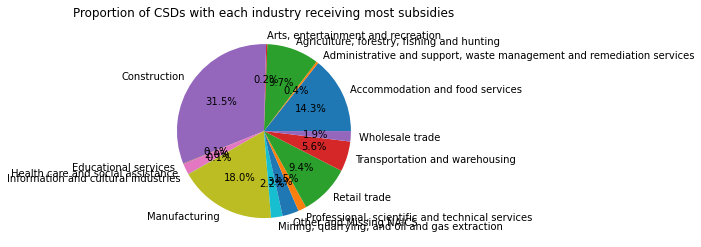

In [49]:
plt.pie(temp2["Region"], labels = temp2["Industry"], autopct = '%1.1f%%')
plt.title("Proportion of CSDs with each industry receiving most subsidies")
#plt.savefig("PropCSDByIndPie.png")
plt.show()

In [50]:
inds = list(temp2[temp2["Region"] < 10].Industry)
weirds = list(temp3[temp3["Industry"].isin(inds)].Region)

temp = cews.query("GeoAggregation == 'CSD' and IndustryAggregation == 'Level 1'")
temp = temp[temp["Region"].isin(weirds)].groupby(["Region", "Province", "Industry"]).sum().reset_index()
set(temp["Region"])

{'Clearwater County',
 'Contrecoeur',
 'East Kootenay F',
 'Erin',
 'Grand Bay-Westfield',
 'Hudson',
 'Kimberley',
 'Lake Cowichan',
 'Malartic',
 'Rothesay',
 'Southwold',
 'Stonewall',
 'Tsawwassen',
 "Tsuu T'ina Nation 145 (Sarcee 145)"}

In [51]:
prov

'Newfoundland and Labrador'

In [52]:
charts = [0]*(len(weirds))
for div, i in zip(weirds, range(len(weirds))):
    temp2 = temp[temp["Region"] == div]
    prov = temp2["Province"].iloc[0]
    charts[i] = alt.Chart(temp2, title = f"{div}, {prov}").mark_bar(color = getProvCols([prov])[0]).encode(
                    #alt.Color("Province", scale = alt.Scale(domain = provinces, range = provColors), legend = None),
                    y = "Industry",
                    x = "Subsidy",
                )

(charts[0]|charts[1]) & (charts[2]|charts[3]) & (charts[4]|charts[5]) &\
(charts[6] | charts[7]) & (charts[8] | charts[9]) & (charts[10] | charts[11])

alt.VConcatChart(...)